## Visualize and Analyze EDX data

In [1]:
from functions import *

#### visualize quickly a map - only works if you have coordinates written

In [ ]:
folder = r"O:\Nlab\Public\DCH-plasma\phosphosulfides_students\Students\Giulia\01_Characterization\layerprobe\anait_0001_BaS_Zr"
filepath = os.path.join(folder, "anait_0001_BR.xlsx")
new_heatmap("Layer 1 Ba Atomic %", filepath=filepath, title = "anait_0001_BR", 
#savepath = os.path.join(folder, "test.html")
)

#### rename SE images, if needed

If you have automated SEM images taken during EDX mapping in one folder, but the image numbers do not correspond to the point number in the EDX map, this function renames the image files in order ( smallest number => 1)

In [ ]:
# folderpath= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\EDX\mittma_0023_FL"
rename_SE_images(folderpath)

### Add coordinates to excel files
In the first box: add coordinates to one file, in the second: loop over more files in the excel folder

In [ ]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0016_Cu\EDX\excels"
filename= "mittma_0011_FR" # without extension

# if no coordinates were written for this file, but only magnification, spacing, nrow, ncolumns - returns coordinates in the sample
#EDX_coordinates(folder, filename, edge=4)

# if coordinates for 3 points were written, and you want the stage coordinates (for uploading to nomad)
#EDX_stage_coords(folder, filename)

#if coordinates for 3 points were written, and you want the sample coordinates (for further processing locally)
# EDX_sample_coords(folder, filename)

#if all coordinates were written, and you want to translate them to sample coordinates (for further processing locally)
lp_translate_excel(folder, filename) 

In [ ]:
# more files at the same time
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0011_Cu\EDX\excels"
sample = "mittma_0011"
pos = [ "BR",
        "FR",
        "FL", 
        "BL"
        ]
names = [sample+"_"+p for p in pos]

# for i in range(0,len(pos)): #uncomment the one you need
for name in names:
    # EDX_coordinates(folder, name, edge=4)
#   EDX_stage_coords(folder, name)
    # EDX_sample_coords(folder, name)
    lp_translate_excel(folder, name)

### loading data from excels file
Only do this if all files already have cooridnates written. 
The most common reason for errors here is if there are extra columns or comments in the first sheet of the excel file, differently from the template. If you get an error check this first

In [ ]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0022_Cu\EDX\excels"

sample = "mittma_0022"
pos = [ "BR",
        "FR",
        "FL", 
        "BL"
        ]
# pos= ['B']
names = [sample+"_"+p for p in pos]

In [ ]:
datas = [pd.DataFrame() for _ in pos]

for i in range(0,len(pos)):
    file = sample+"_"+pos[i]+"_sample_coords.xlsx" #change to coords, sample_coords, stage_coords, translated as needed
    filepath = os.path.join(folder, file)
    grid = measurement_grid(200,200,38,38,-19,-19)
    datas[i], coords = read_layerprobe(filepath, grid, sheetname="Sheet1")
    plt.figure()
    plot_grid(coords, grid)

# if not all four squares are present, comment out the ones that are missing, 
# and correct the numbers in datas[i], so that they are 0, 1, 2..    

data__BR, coords_BR = translate_data(datas[0], 20,20)
data__FR, coords_FR = translate_data(datas[1], 20,-20)
data__FL, coords_FL = translate_data(datas[2], -20,-20)
data__BL, coords_BL = translate_data(datas[3], -20,20)

data = combine_data(( data__BR,
                    data__FR,
                     data__FL, 
                      data__BL
                    ))
data0= data.copy()

sample_df= data0.copy()

#### add a column with sample ID to the data, and export to pickles


In [5]:
sample_n= 22  # change to the sample number!
sample_dict = {'Sample ID': [sample_n]*len(data0.columns.get_level_values(0).unique())}
sample_df = add_info(data0, sample_dict)

display(sample_df)

Coordinate 4.4399999999999995,2.34                          \
Data type    Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                            100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           98.43               9.14              19.59   

Coordinate                               4.4399999999999995,9.59  \
Data type  Layer 1 Cu Atomic % Sample ID   Substrate Si Atomic %   
0                        71.27        22                   100.0   

Coordinate                                                 ...  \
Data type  Layer 1 Density (g/cm³) Layer 1 Thickness (nm)  ...   
0                             4.33                 110.08  ...   

Coordinate -5.199999999999999,30.22                                \
Data type        Layer 1 S Atomic % Layer 1 Cu Atomic % Sample ID   
0                              19.4               71.55        22   

Coordinate -5.199999999999999,37.09                          \
Data type     Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                             100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          140.55               8.19              19.29   

Coordinate                                
Data type  Layer 1 Cu Atomic % Sample ID  
0                        72.53        22  

[1 rows x 672 columns]

In [5]:
#%% ------------------export pickle to use elsewhere ---------------------

pickle_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\mittma_pickles" # change to your pickle path
with open(os.path.join(pickle_path, sample+"_EDS.pkl"), 'wb') as f:
    pickle.dump(sample_df, f)

In [ ]:
# ------------------import pickle to use here ---------------------
pickle_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\mittma_pickles" # change to your pickle path
sample= 'mittma_0022'
with open(os.path.join(pickle_path, sample+"_EDS.pkl"), 'rb') as f:
    sample_df = pickle.load(f)

#### Find points with a certain composition
you can specify a range in % for each element, or a stoichiometry and a certain tolerance (+- tol%)

Layer 1 Cu Atomic % data at all coordinates.
Layer 1 Cu Atomic % data at all coordinates.
Layer 1 P Atomic % data at all coordinates.
Layer 1 P Atomic % data at all coordinates.
Layer 1 S Atomic % data at all coordinates.
Layer 1 S Atomic % data at all coordinates.


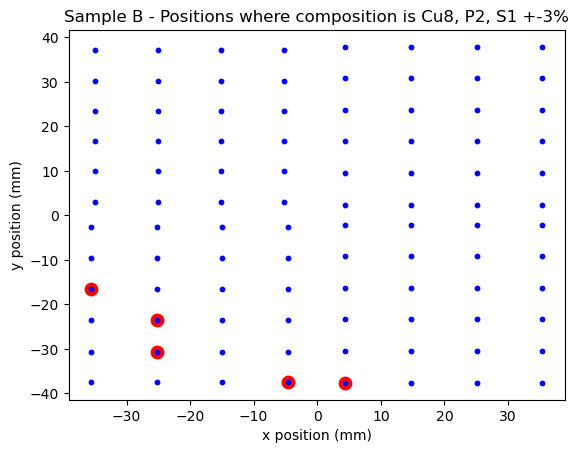

In [6]:

# good_comp_df= find_composition(sample_df, 'Cu','P','S', range1=[40,50], range2=[5,10], range3=[40,50],display_option=False)
good_comp_df= find_composition(sample_df, 'Cu','P','S',display_option=False, stoichiometry=[8,2,1], tolerance= 3, sample='Sample B')


#### plot heatmaps for the whole sample (combined)

In [20]:
def new_heatmap(datatype, data=None, filepath = None, exclude=None, cbar= None, index= None, savepath=None, title=None):
    "plot heatmaps with interpolated background, like in Nomad, if savepath ends with .png, it will save as png, if it ends with .html, it will save as html (interactive)"

    if filepath is not None:
        raw_data = pd.read_excel(filepath, header=0)
        x = raw_data["X (mm)"].values
        y = raw_data["Y (mm)"].values 
        z = raw_data[datatype].values

    if data is not None: 
        if exclude != None:
            grid = MI_to_grid(data).drop_duplicates(ignore_index=True)
            for point in exclude:
                xx, yy= closest_coord(grid, point[0], point[1])
                data = data.drop(data.iloc[:,data.columns.get_level_values(0)==f'{xx},{yy}'], axis=1)
        xy = MI_to_grid(data).drop_duplicates(ignore_index=True)
        x = xy["x"].values
        y = xy["y"].values
        if index ==None:
            z = data.iloc[:, data.columns.get_level_values(1)==datatype].dropna().values.flatten()
        else:
            z = data.iloc[index, data.columns.get_level_values(1)==datatype].dropna().values.flatten()

    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    scatter = go.Scatter(
            x=x,
            y=y,
            mode='markers',
            marker=dict(
                size=15,
                color=z,  # Set color to thickness values
                colorscale='Viridis',  # Choose a colorscale
                showscale=False,  # Hide the colorbar for the scatter plot
                line=dict(
                    width=2,  # Set the width of the border
                    color='DarkSlateGrey'  # Set the color of the border
            ) ),
        )
    
    if datatype.startswith("Layer 1"):
        cbar_title = datatype[8:]
    else:
        cbar_title = datatype
    if cbar != None:
        cbar_title = cbar

    heatmap = go.Heatmap(
    x=xi[0],
    y=yi[:, 0],
    z=zi,
    colorscale='Viridis',
    colorbar=dict(title=cbar_title),
    )

    fig = go.Figure(data=[heatmap, scatter])

    if title == None:
        title = datatype
    
    fig.update_layout(title=title,
    xaxis_title='X Position (mm)',
    yaxis_title='Y Position (mm)',
    template='plotly_white',
    autosize =False,
    width = 600,
    height = 500)

    if savepath:
        if savepath.endswith(".png"):
            fig.write_image(savepath, scale=2) #scale sets the resolution here
        
        if savepath.endswith(".html"):
            fig.write_html(savepath)
    
    fig.show()


In [ ]:
#plot raw data for the whole sample
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 

list_to_exclude= [[-4.6,-2.5]] # if you want to exclude some points, write them as a list [[x1,y1], [x2,y2]..]

for datatype in datatypes:
    savepath = os.path.join(folder, f"{sample} {datatype}.png") # save in .png or html
    new_heatmap(datatype, data=data0, title = f"{sample} {datatype}",
            exclude=list_to_exclude, 
    # savepath=savepath, 
     )

In [23]:
# calculate ratios or other operations on the data 

data_1= calculate_ratio(data, 'P', 'S')
data_1= calculate_ratio(data_1, 'S', 'Cu')
data_1= calculate_ratio(data_1, 'P', 'Cu')

data_1= math_on_columns(data_1, 'Layer 1 S Atomic %', 'Layer 1 P Atomic %', '+')
data_1= math_on_columns(data_1, 'Layer 1 Cu Atomic %', 'Layer 1 S Atomic % + Layer 1 P Atomic %', '/')
data_1.drop(columns=['Layer 1 S Atomic % + Layer 1 P Atomic %'],level=1, inplace=True)
data_1.rename(columns={'Layer 1 Cu Atomic % / Layer 1 S Atomic % + Layer 1 P Atomic %': 'Cu/anions'}, inplace=True)


data_1= calculate_el_thickness(data_1, 'Cu')
data_1= calculate_el_thickness(data_1, 'S')
data_1= calculate_el_thickness(data_1, 'P')

## correct for density linearly
# density_correction= 5/4.33
# data_1= math_on_columns(data, 'Layer 1 Thickness (nm)', density_correction, '*')
# data_1.rename(columns={f'Layer 1 Thickness (nm) * {density_correction}': 'Thickness (nm)'}, inplace=True)   

display(data_1)


Coordinate 4.4399999999999995,2.34                          \
Data type    Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                            100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           98.43               9.14              19.59   

Coordinate                                                             ...  \
Data type  Layer 1 Cu Atomic %       P/S     S/Cu      P/Cu Cu/anions  ...   
0                        71.27  0.466565  0.27487  0.128245  2.480682  ...   

Coordinate -5.199999999999999,37.09                                         \
Data type        Layer 1 P Atomic % Layer 1 S Atomic % Layer 1 Cu Atomic %   
0                              8.19              19.29               72.53   

Coordinate                                                                 \
Data type        P/S      S/Cu      P/Cu Cu/anions     Cu [nm]     S [nm]   
0           0.424572  0.265959  0.112919  2.639374  101.940915  27.112095   

Coordinate             
Data type      P [nm]  
0           11.511045  

[1 rows x 1248 columns]

In [ ]:
os.makedirs(os.path.join(folder, "ratios"), exist_ok=True)

to_plot= ["P/S","S/Cu", "P/Cu", "Cu [nm]", "S [nm]", "P [nm]"]
names = ['P_S_ratio', 'S_Cu_ratio','P_Cu_ratio',  'Cu_Thickness_prod', 'S_Thickness_prod', 'P_Thickness_prod']

for i in range (0, len(to_plot)):
    
    datatype = to_plot[i]
    name = names[i]
    savepath = os.path.join(folder,'ratios', f"{sample}_{name}.png")
    new_heatmap(datatype, data=data_1, title = f"{sample} {datatype}",
            exclude=list_to_exclude,
    # savepath=savepath,
     )
    


#### plot a heatmap for each single sample

In [ ]:
#plot for single samples
os.makedirs(os.path.join(folder,"plots"), exist_ok=True)
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 


for i in range(len(datas)): 
    for datatype in datatypes:
        savepath = os.path.join(folder,"plots", f"{sample}_{pos[i]} {datatype}.png")
        new_heatmap(datatype, data=datas[i], title = f"{sample}_{pos[i]} {datatype}",
        savepath=savepath,
        exclude =list_to_exclude
        )

In [ ]:
data_FL = math_on_columns(datas[1], "Layer 1 P Atomic %", "Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 P Atomic % / Layer 1 S Atomic %': 'Bulk P/S ratio '}, inplace = True)
data_FL = math_on_columns(data_FL, "Layer 1 P Atomic %", "Layer 1 S Atomic %", "+")
data_FL = math_on_columns(data_FL, "Layer 1 Cu Atomic %", "Layer 1 P Atomic % + Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 Cu Atomic % / Layer 1 P Atomic % + Layer 1 S Atomic %': 'Bulk Cu/anions ratio'}, inplace = True)

display(data_FL)
new_heatmap("Bulk Cu/anions ratio", data=data_FL, title = f"{sample}_FL Bulk Cu/anions ratio",savepath= os.path.join(folderpath, f"{sample}_FL Bulk Cu_anions ratio.png"))

##### get statistics

In [31]:
Cu_data = stats(data, "Layer 1 Cu Atomic %")
P_data = stats(data, "Layer 1 P Atomic %")
S_data = stats(data, "Layer 1 S Atomic %")

results = pd.concat([Cu_data, P_data, S_data], axis=1)
results.columns = ["Cu", "P", "S"]
display(results)

ratio0 = results.loc["mean", "Cu"]/results.loc["mean", "P"]
ratio2 = results.loc["mean", "S"]/results.loc["mean", "P"]

Layer 1 Cu Atomic % data at all coordinates.
Layer 1 P Atomic % data at all coordinates.
Layer 1 S Atomic % data at all coordinates.


,Cu,P,S
min,64.550000,0.090000,3.4500
max,76.330000,21.430000,34.0000
mean,72.036979,9.675208,18.2875
